# 課題

授業内演習でやったシステムについて，Python-controlでゲイン線図を折れ線近似と重ねてプロットせよ．できる者は位相線図についてもプロットせよ．

\begin{eqnarray}
G(s) &=& \frac{s}{(s+1)(s+10)} \nonumber \\ \nonumber
&=& \frac{s}{10} \cdot \frac{1}{s+1} \cdot \frac{1}{0.1s+1} \nonumber
\end{eqnarray}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

In [2]:
n = [[1, 0], [1, 0]]
d = [[1, 11, 10], [10]]
P = [tf(n[0], d[0]), tf(n[1], d[1])]
w = np.logspace(-2, 3, 1000)

gain1, phase1, w = bode(P[0], w, plot=False)
g_dB1 = 20 * np.log10(gain1)
p_deg1 = phase1 * 180 / np.pi

gain2, phase2, w = bode(P[1], w, plot=False)
g_dB2 = 20 * np.log10(gain2)
p_deg2 = phase2 * 180 / np.pi

#ωT = 1で折れる
x1 = [0, 1, 1000]
y1 = [0, 0, -60]

#ωT = 1で折れる
x2 = [0, 10, 1000]
y2 = [0, 0, -40]

#ωT = 0.2, 5で折れる
x3 = [0, 0.2, 5, 1000]
y3 = [0, 0, -90, -90]

#ωT = 0.2, 5で折れる
x4 = [0, 2, 50, 1000]
y4 = [0, 0, -90, -90]

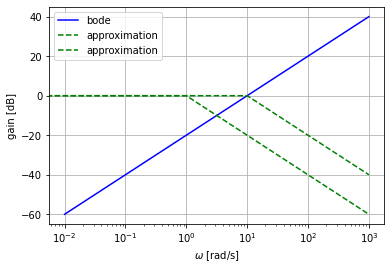

In [3]:
#plt.semilogx(w, g_dB1, label="bode", color="blue")
plt.semilogx(w, g_dB2, label="bode", color="blue")
plt.plot(x1, y1, label="approximation", color="green", linestyle="--")
plt.plot(x2, y2, label="approximation", color="green", linestyle="--")
plt.xlabel("$\omega $ [rad/s]")
plt.ylabel("gain [dB]")
plt.legend()
plt.grid()
plt.show()

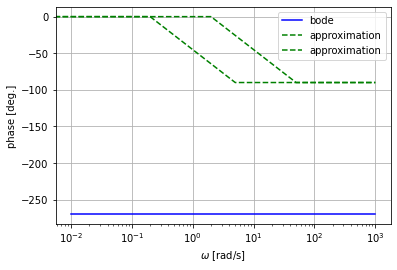

In [4]:
#plt.semilogx(w, p_deg1, label="bode", color="blue")
plt.semilogx(w, p_deg2, label="bode", color="blue")
plt.plot(x3, y3, label="approximation", color="green", linestyle="--")
plt.plot(x4, y4, label="approximation", color="green", linestyle="--")
plt.xlabel("$\omega $ [rad/s]")
plt.ylabel("phase [deg.]")
plt.legend()
plt.grid()
plt.show()